<b>Question 1</b>

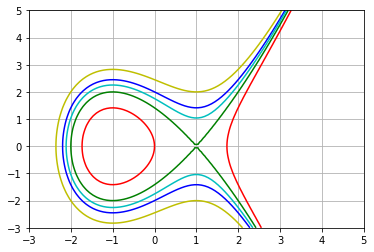

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

import sys

a = -3;
b = [0,2,4,6,3.08];
C="rgbyc"
for i in range(len(b)):
    y, x = np.ogrid[-3:5:100j, -3:5:100j]
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b[i], [0],colors=C[i])
    
plt.grid() 
    

plt.show()

<b> Question 2</b>

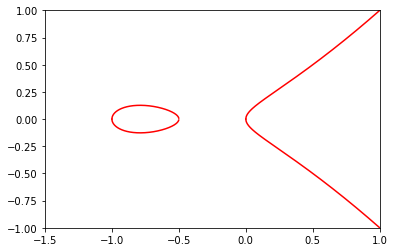

In [23]:
x1 = np.arange(-1, -0.5, 0.001)
x2= np.arange(0, 1, 0.001)
Y1=np.multiply(x1,np.multiply(x1+1,(2*x1+1)/6.0))
Y2=np.multiply(x2,np.multiply(x2+1,(2*x2+1)/6.0)) 
Y1=np.sqrt(Y1)
Y2=np.sqrt(Y2)
y1n=-Y1        
y2n=-Y2    
plt.plot(x1, Y1,c='r')
plt.plot(x1,y1n,c='r')
plt.plot(x2,Y2,c='r')
plt.plot(x2,y2n,c='r')
plt.xlim([-1.5, 1])
plt.ylim([-1, 1])
plt.show() 

<b>Question 5 </b>

In [24]:
def EllipticCurvePointAddition(P1,P2,a,b):
    if P1[0]==math.inf:
        SumPoints=P2
    elif P2[0]==math.inf:
        SumPoints=P1
    elif P1==P2:
        dx=2*P1[1]
        dy=(3*P1[0]**2)+a
        if dx!=0:
            m=dy/dx
            x3=(m**2)-P1[0]-P2[0]
            y3=m*(P1[0]-x3)-P1[1]
            SumPoints=[x3, y3]
        else:
            m=math.inf
            SumPoints=[math.inf, math.inf]
    else:
        if P1[0]!=P2[0]:
            m=(P2[1]-P1[1])/(P2[0]-P1[0])
            x3=(m**2)-P1[0]-P2[0]
            y3=(m*(P1[0]-x3))-P1[1]
            SumPoints=[x3, y3]
        else:
            m=math.inf
            SumPoints=[math.inf, math.inf]
    return SumPoints

In [25]:
P=[0,-1]
P2=EllipticCurvePointAddition(P,P,0,1)
print(P2)

[0.0, 1.0]


In [26]:
P3=EllipticCurvePointAddition(P,P2,0,1)
print(P3)

[inf, inf]


In [27]:
P4=EllipticCurvePointAddition(P2,P2,0,1)
print(P4)

[0.0, -1.0]


In [28]:
P5=EllipticCurvePointAddition(P2,P3,0,1)
print(P5)

[0.0, 1.0]


In [29]:
P6=EllipticCurvePointAddition(P3,P3,0,1)
print(P6)

[inf, inf]


In [30]:
P7=EllipticCurvePointAddition(P4,P3,0,1)
print(P7)

[0.0, -1.0]


In [31]:
P13=EllipticCurvePointAddition(P6,P7,0,1)
print(P13)

[0.0, -1.0]


<b> Question 6 </b>

In [32]:
def egcd(a, b):
    if a == 0:
        return b, 0, 1
    else:
        gcd, x, y = egcd(b % a, a)
        return gcd, y - (b // a) * x, x

In [33]:
def ModInv(a,n):
    d,x,y=egcd(a, n)
    if d>1:
        raise MyValidationError("Error: The number ",d," has no inverse mod")
    return x%n

In [54]:
def EllipticCurvePointAdditionModp(P1,P2,a,b,p):
    if P1[0]==math.inf:
        SumPoints=P2
    if P2[0]==math.inf:
        SumPoints=P1
    if P1==P2:
        dx=(2*P1[1])%p
        dy=((3*P1[0]**2)+a)%p
        if math.gcd(dx,p)==1:
            m=(dy*ModInv(dx,p))%p
            x3=(m**2-P1[0]-P2[0])%p
            y3=(m*(P1[0]-x3)-P1[1])%p
            SumPoints=[x3,y3]
        else:
            m=math.inf
            SumPoints=[math.inf,math.inf]
    else:
        if math.gcd(P2[0]-P1[0],p)==1:
            m=((P2[1]-P1[1])*ModInv(P2[0]-P1[0],p))%p
            x3=(m**2-P1[0]-P2[0])%p
            y3=(m*(P1[0]-x3)-P1[1])%p
            SumPoints=[x3,y3]
        else:
            m=math.inf
            SumPoints=[math.inf,math.inf]
    return SumPoints

In [55]:
P=[0,1]
P2=EllipticCurvePointAdditionModp(P,P,2,1,11)
print(P2)

[1, 9]


In [56]:
P3=EllipticCurvePointAdditionModp(P,P2,2,1,11)
print(P3)

[8, 1]


In [57]:
P6=EllipticCurvePointAdditionModp(P3,P3,2,1,11)
print(P6)

[10, 3]


In [60]:
P9=EllipticCurvePointAdditionModp(P3,P6,2,1,11)
print(P9)

[5, 2]
